In [49]:
import numpy as np
import os
import cv2
import pickle
import tensorflow as tf
from tensorflow.python.keras.backend import learning_phase
import matplotlib.pyplot as plt

In [50]:
def loadData(path="output"):
    '''
    Loads the data to be used by the classifiers
    '''
    pickle_in = open(path+"/X.pickle", "rb")
    X = pickle.load(pickle_in)
    pickle_in = open(path+"/y.pickle", "rb")
    y = pickle.load(pickle_in)
    pickle_in = open(path+"/data.pickle", "rb")
    data = pickle.load(pickle_in)

    return X,y,data

In [51]:
X,y,_ = loadData()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [52]:
model = tf.keras.models.load_model('output/model')

In [53]:
results = model.evaluate(np.asarray(X_test),np.asarray(y_test))
print(results)

9/9 [==============================] - 1s 64ms/step - loss: 0.1302 - accuracy: 0.9768
[0.13022199273109436, 0.9768339991569519]


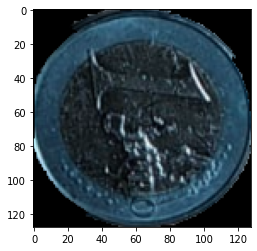

(128, 128, 3)


In [63]:
coin = np.asarray(cv2.imread("images/coin2.png"))
coin = cv2.resize(coin, (128,128))
plt.imshow(coin)
plt.show()
print(coin.shape)
to_predict = []
to_predict.append(coin)

In [64]:
predictions = model.predict(np.asarray(to_predict))
result = np.where(predictions == np.amax(predictions))
CATEGORIES = ['1c', '1e', '2c','2e','5c','10c','20c','50c']  
print("Is: ", CATEGORIES[result[1][0]])

Is:  1e
